In [1]:
#import pandas
import pandas as pd

In [2]:
#read the csv file from the web
data=pd.read_csv("http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv",index_col=0)

#display first 5 rows
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
#getting genral infor about the file
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


In [4]:
#printing last  five rows
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [5]:
#displaying the dataframes shape attribute
data.shape

(200, 4)

So this dataframe has 200 rows and 4 columns

### Structuring the data as a supervised learning tast
#### What are Features?
- ** TV** - advertising dollar spent on TV for a single product in an given market in 1000s of dollars
- ** Radio** -advertising dollar spent on radio
- ** Nespater** -advertising dollar spent on Newspaper

#### What is the response?
- ** Sales** - Sales of a single product in a given market in 1000s of items

#### What do we know?
- Response value is continious and thus the problem can be classfied as regression
- There are 200 rows which represent a single market


In [6]:
# Lets visulaize the data using seaborn to get insight
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

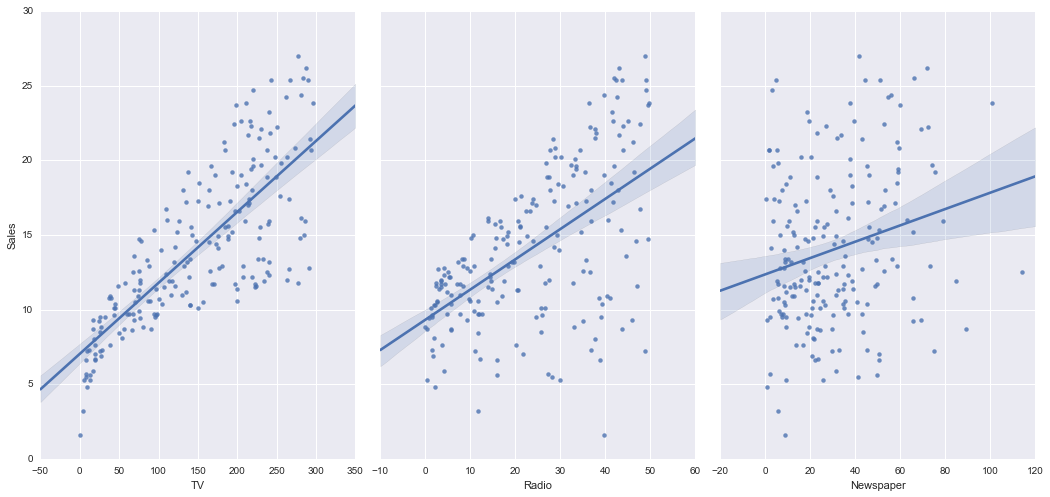

In [7]:
sns.pairplot(data,x_vars=["TV","Radio","Newspaper"],y_vars="Sales",size=7,aspect=0.7,kind="reg")

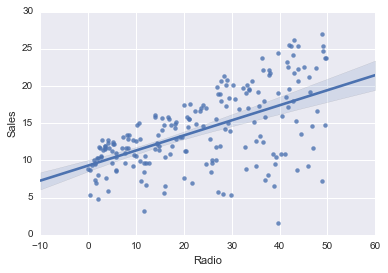

In [8]:
#quick regplot using sns
sns.regplot("Radio","Sales",data=data)

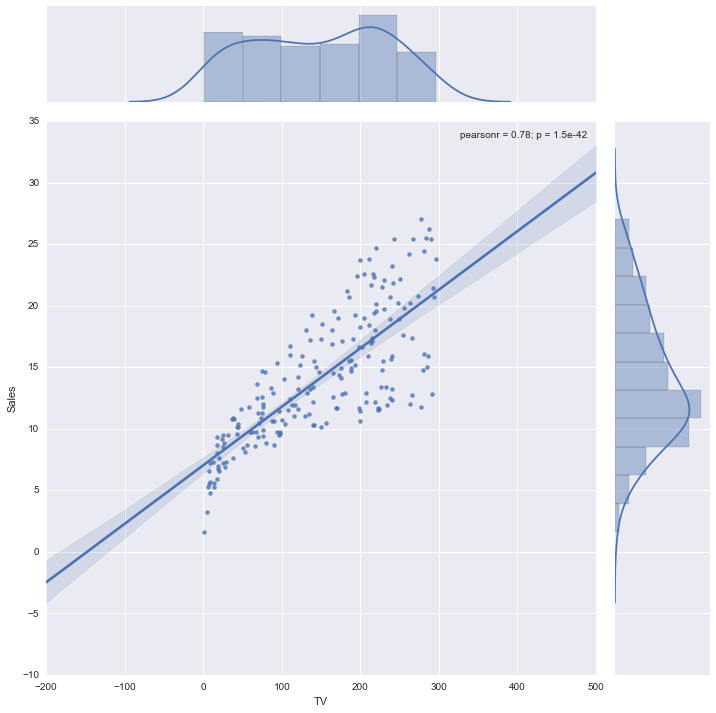

In [9]:
#quick linear regression visualisation and gettitng estimation or r and p value
sns.jointplot("TV","Sales",data=data,size=10,kind="reg")

## Preparing X and y using pandas
- Scikit learn except X(feature matrix) and y(response vector) to be numpy array
- Pandas is built on top of numpy array
- Thus X can be pandas dataframe and y can be pandas series

In [10]:
#create python list of feature names
features_col=["TV","Radio","Newspaper"]

#use the list to create a subset of the original DataFrame
X=data[features_col]

#prining first five rows
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [11]:
#cheking type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [12]:
#select series form the Dataframe
y=data["Sales"]

#print first five rows
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [13]:
#Checking type and shapeof y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


### Splitting data into traiing and testing sets

In [14]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)


In [15]:
#by default the split is 75% training set and 25% testing set
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(50,)
(50,)


## Linear Regression in Scikit Learn

In [16]:
#importing model
from sklearn.linear_model import LinearRegression

#creting linear regression object or instantation
linreg=LinearRegression()

#fir the modle to the training data to learn the coefficents of the linear regression
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Interpreting Coefficients

In [17]:
#printing the intercept and the coefficient of the equaiton
print("The intercept is %f"%linreg.intercept_)
print("The coefficient are as follows:-")
print(linreg.coef_)

The intercept is 2.876967
The coefficient are as follows:-
[ 0.04656457  0.17915812  0.00345046]


In [18]:
#pair the feature names with the feature coefficients
zip(features_col,linreg.coef_)

** y = 2.877 + 0.0466 X TV + 0.179 X Radio + 0.00345 X Newspaper **

The index of the coeffeiicnt corresponding to each feature i.e. TV, Radio or Newspaper corresponds to the columns sequence in the dataframe. THe dataframe we used had "TV" as first column,"Radio" as the second column and "Newspater" as the third column.

**  Importatnt Note **

The coefficient represents assosiation and not causation. We cannot tell for certaion that the TV caused 0.0466 unite increase for certain.


## Making Predictions

In [19]:
#make predictions on the testing set
y_pred=linreg.predict(X_test)

We need an ** evluation ** metric in order to compare the predicted value with the actual value
## Model Evaluation Metrics for Regression

** Lets have a look at the thre most common evaluation metrics for regression problem**

In [20]:
#define true and predicted response values
true=[100,50,30,20]
pred=[90,50,50,30]

### Mean absolute error or the mean of absolute value of errors (MAE)



In [21]:
#doing it manually
print((10+0+20+10)/4)

#using numpy
import numpy as np
import statistics as sts
print(sts.mean(np.abs(np.array(true)-np.array(pred))))

#using scikit learn
from sklearn import metrics
print(metrics.mean_absolute_error(true,pred))

10.0
10.0
10.0


### Mean Squared Error (MSE)

In [22]:
#calculating by hand
print((10**2+0**2+20**2+10**2)/4)

#MSE using scikit learn
print(metrics.mean_squared_error(true,pred))

150.0
150.0


### Root Mean Squared Error (RMSE)

In [23]:
#calculating by hand
import numpy as np
print(np.sqrt((10**2+0**2+20**2+10**2)/4))

#using scikit learn
print(np.sqrt(metrics.mean_squared_error(true,pred)))


12.2474487139
12.2474487139


### Comparing the Errors
- **MAE** is the easiest to interpret as it is just the average of error
- **MSE**  is more popular than MAE as it magnifies the larger error
- **RMSE** is even more popular than MSE because RMSE is interpretable in terms of "y" units i.e. it is of the same unit as reponse variable


## Computing RMSE for our Sale predictions

In [24]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

1.40465142303


## Feture Selection
Lets start exploring the effects of the features on the sales
- Does **Newspaper** belong in our model? In other words, does it improve the quality of our predictions?
- Let's try removing it from our model and chek out the RMSE

In [25]:
#Create Python list of Feaure Names
feature_cols=["TV", "Radio"]

#Use the feature list to select subset of the original DataFrame
X=data[feature_cols]

#Select the Series to represent the target form the DataFrame
y=data.Sales

#Split the datas into traning and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

#fit the model to the training data
linreg.fit(X_train,y_train)

#make prediction on the testing data
y_pred=linreg.predict(X_test)

#compute the RMSE of the prediction
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

1.38790346994


We can see that removing the Newspaper as a feture in our model yields a lower ** RMSE** which meeans, it is unlikely tha this feature is useful for predicting sales. So it is plausible to remoove from the model. Note: Lower **RMSE means better**.

## Cross-Validataion example: feature Selection

### Frstly all 3 features will be used for model

In [26]:
from sklearn.cross_validation import cross_val_score
#create python list of feature names
features_col=["TV","Radio","Newspaper"]

#use the list to create a subset of the original DataFrame
X=data[features_col]

In [27]:
#select series form the Dataframe
y=data["Sales"]

In [28]:
#10-fold cross-validataion with all 3 features 
lm=LinearRegression()
scores=cross_val_score(lm,X,y,cv=10,scoring="mean_squared_error")
print(scores)


[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


In [29]:
#fix the sign of MSE
mse_scores=-scores
print(mse_scores)

[ 3.56038438  3.29767522  2.08943356  2.82474283  1.3027754   1.74163618
  8.17338214  2.11409746  3.04273109  2.45281793]


In [30]:
#convert MSE to RMSE scores
rmse_scores=np.sqrt(mse_scores)

rmse_scores


array([ 1.88689808,  1.81595022,  1.44548731,  1.68069713,  1.14139187,
        1.31971064,  2.85891276,  1.45399362,  1.7443426 ,  1.56614748])

In [31]:
#calculate teh average RMSE
print(rmse_scores.mean())

1.69135317081


In [32]:
#10-fold cross-validataion with two feature (excluding Newspaper)
feature_cols=["TV","Radio"]
X=data[feature_cols]

print(np.sqrt(-cross_val_score(lm,X,y,cv=10,scoring="mean_squared_error")).mean())

1.67967484191


Since the RMSE without the Newspaper as a feture results in lower RMSE we can conclude that the Newspaper is not likely a important or necesary feture in order to predict sales